In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
%matplotlib inline

In [3]:
plt.style.use("fivethirtyeight")

In [4]:
plt.rcParams["figure.figsize"] = [16,8]

In [110]:
plt.rcParams["font.size"] = 14.0
plt.rcParams["legend.fontsize"] = 14.0
plt.rcParams["xtick.labelsize"] = 14.0
plt.rcParams["ytick.labelsize"] = 10.0

In [6]:
df = pd.read_csv("blackjack_data.csv")

In [7]:
df.head()

,d_hand,d_final_hand,p_hand,p_final_hand,strategy,split,num_decks,soft_17,game_type,d_open,d_initial,d_final,d_hit,d_bust,p_initial,p_final,p_hit,p_bust,p_win
0,"K,Q","K,Q","10,4","10,4,10",0,0,4,0,0,10,20,20,0,0,14,24,1,1,0
1,"4,10","4,10,10","7,9","7,9",0,0,4,1,0,4,14,24,1,1,16,16,0,0,1
2,"10,J","10,J","3,3","3,3,3,K",1,0,4,1,0,10,20,20,0,0,6,19,1,0,0
3,"K,K","K,K","A,J","A,J",1,0,4,0,0,10,20,20,0,0,21,21,0,0,1
4,"2,Q","2,Q,3,9","6,2","6,2,5",1,0,4,1,0,2,12,24,1,1,8,13,1,0,1



# Exploratory data analysis

In [72]:
df.p_win.describe()

count    70580.000000
mean         0.416081
std          0.492911
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: p_win, dtype: float64

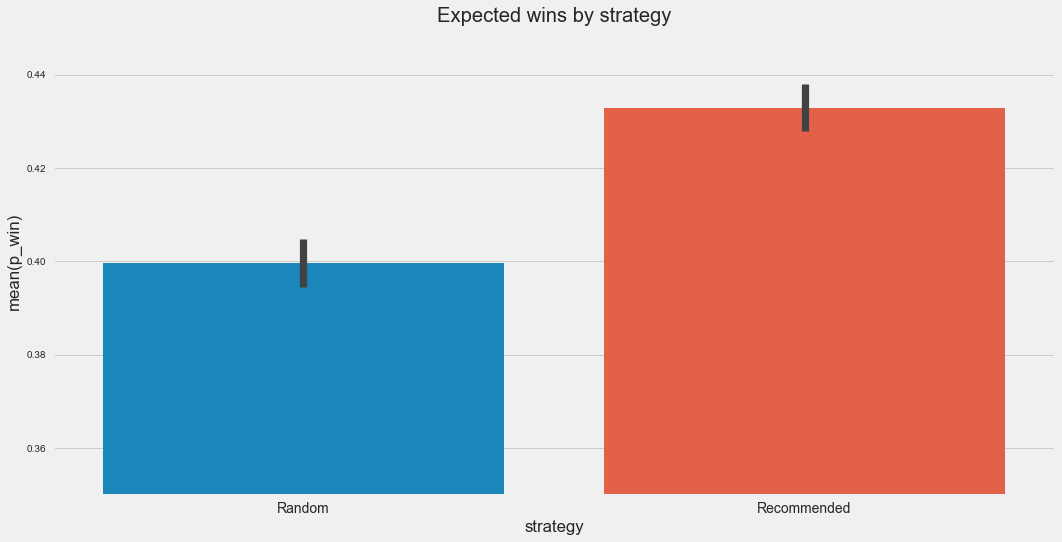

In [122]:
sns.barplot(y="p_win", x="strategy", data=df);
plt.title("Expected wins by strategy");
plt.xticks([0,1], ["Random", "Recommended"]);
plt.ylim(0.35,0.45);

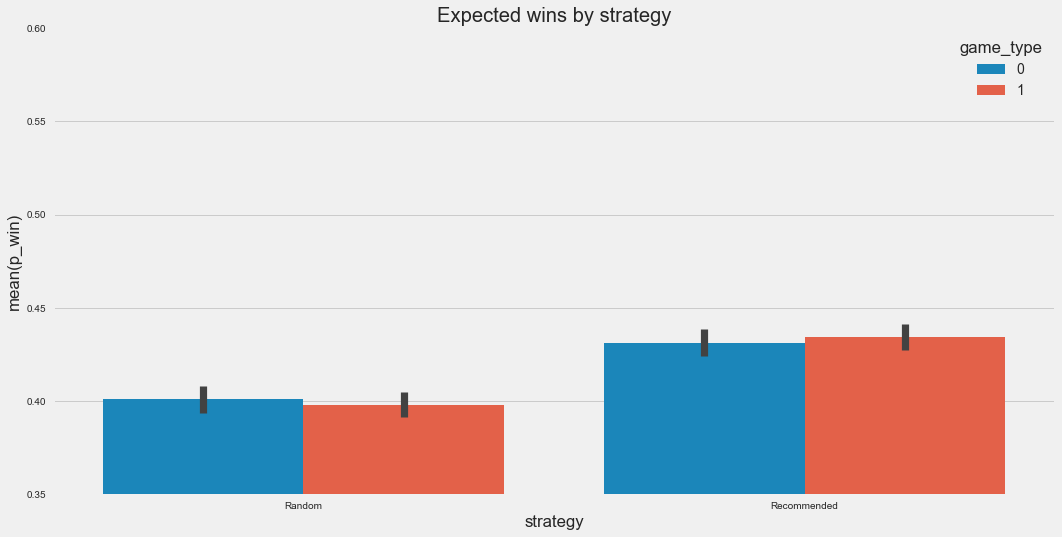

In [80]:
sns.barplot(y="p_win", x="strategy", hue="game_type", data=df);
plt.title("Expected wins by strategy");
plt.xticks([0,1], ["Random", "Recommended"]);
plt.ylim(0.35,0.6);

In [73]:
df.p_win[df.strategy==0].describe()

count    35706.000000
mean         0.399597
std          0.489822
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: p_win, dtype: float64

In [74]:
df.p_win[df.strategy==1].describe()

count    34874.000000
mean         0.432959
std          0.495492
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: p_win, dtype: float64

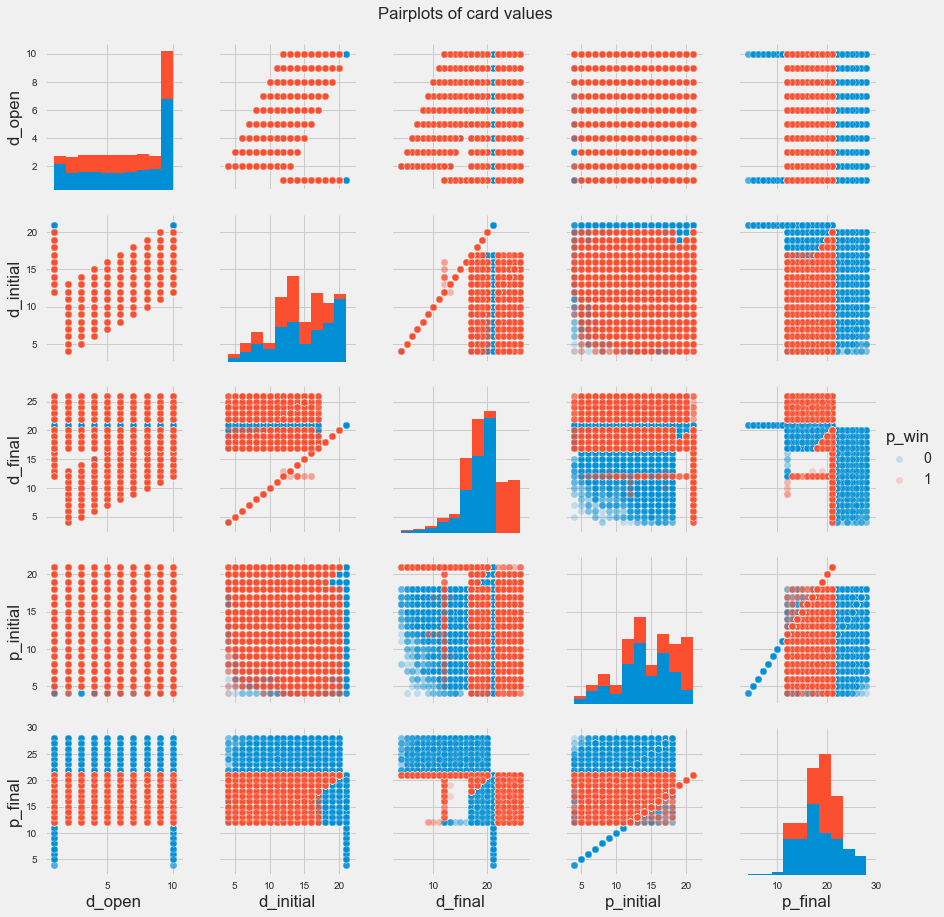

In [86]:
sns.pairplot(df, hue="p_win", 
             vars=[i for i in df.columns[9:] if ("bust" not in i and "hit" not in i and "win" not in i)], 
             plot_kws={"alpha": 0.2});
plt.suptitle("Pairplots of card values", y=1.02);

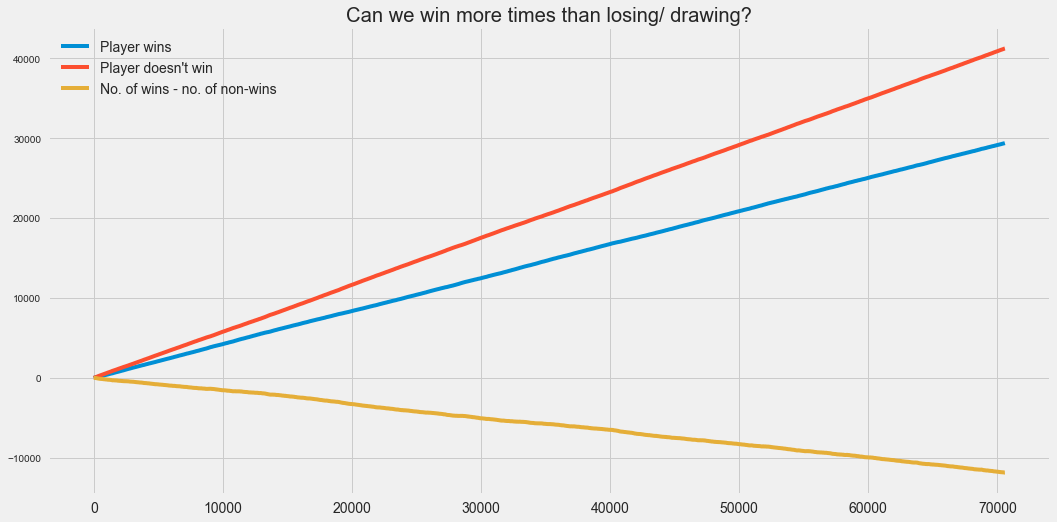

In [121]:
plt.plot(np.cumsum(df.p_win), label="Player wins");
plt.plot(np.cumsum(df.p_win == 0), label="Player doesn't win");
plt.plot(np.cumsum(df.p_win)-np.cumsum(df.p_win == 0), label="No. of wins - no. of non-wins");
plt.legend();
plt.title("Can we win more times than losing/ drawing?");

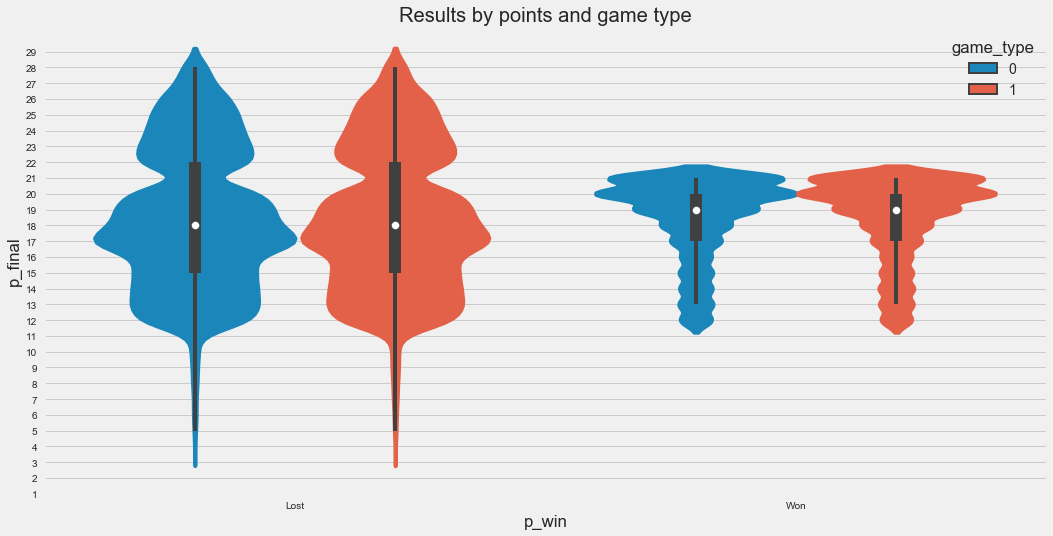

In [31]:
sns.violinplot(hue="game_type", y="p_final", x="p_win", data=df);
plt.yticks(np.arange(1,30));
plt.xticks([0,1], ["Lost", "Won"]);
plt.title("Results by points and game type");

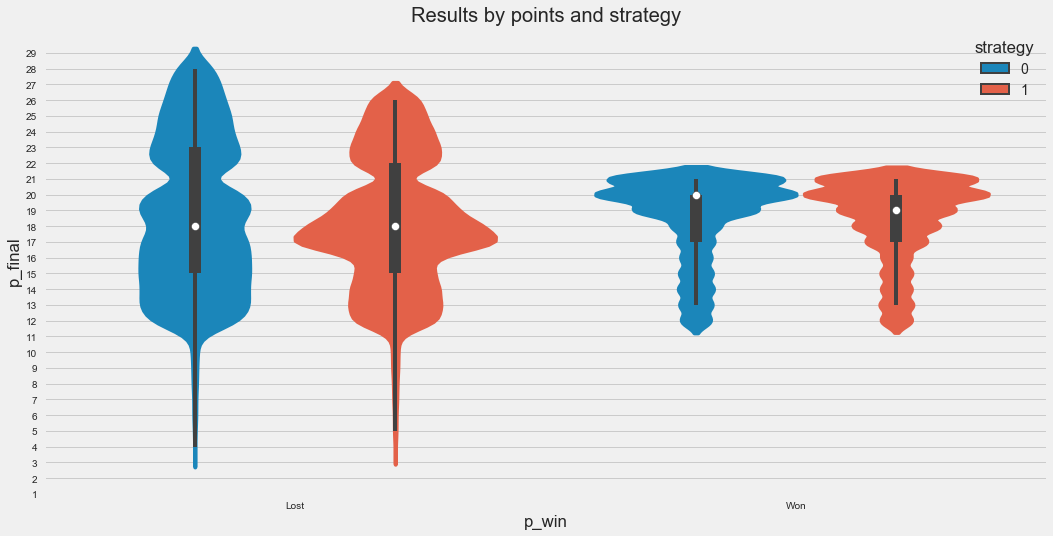

In [32]:
sns.violinplot(hue="strategy", y="p_final", x="p_win", data=df);
plt.yticks(np.arange(1,30));
plt.xticks([0,1], ["Lost", "Won"]);
plt.title("Results by points and strategy");

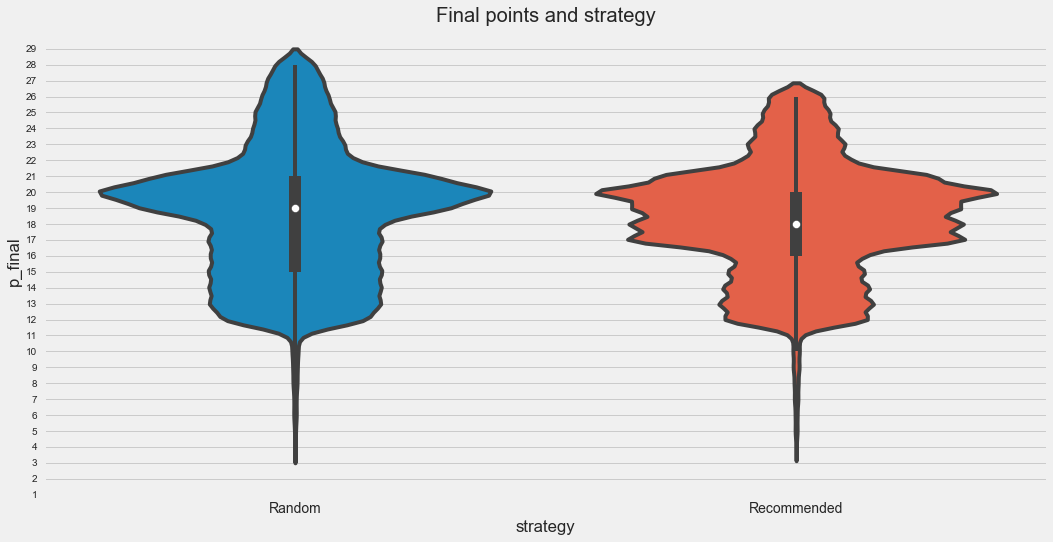

In [112]:
sns.violinplot(x="strategy", y="p_final", data=df, );
plt.yticks(np.arange(1,30));
plt.xticks([0,1], ["Random", "Recommended"]);
plt.title("Final points and strategy");

# How often do you win?

In [14]:
def get_win_p(data, num_games=100, soft=None, strategy=None, game_type=None):
    games = data.copy()
    if soft != None:
        games = games[games.soft_17==soft]
    if strategy != None:
        games = games[games.strategy==strategy]
    if game_type != None:
        games = games[games.game_type==game_type]
    games = games.p_win
    out = np.random.choice(games, size=num_games)
    return sum(out)/num_games

In [15]:
get_win_p(df)

0.40000000000000002

In [51]:
num_trials = 1000

## Continuous shuffling vs no shuffling

In [17]:
con = [get_win_p(df, game_type=0) for _ in range(num_trials)]

In [18]:
nos = [get_win_p(df, game_type=1) for _ in range(num_trials)]

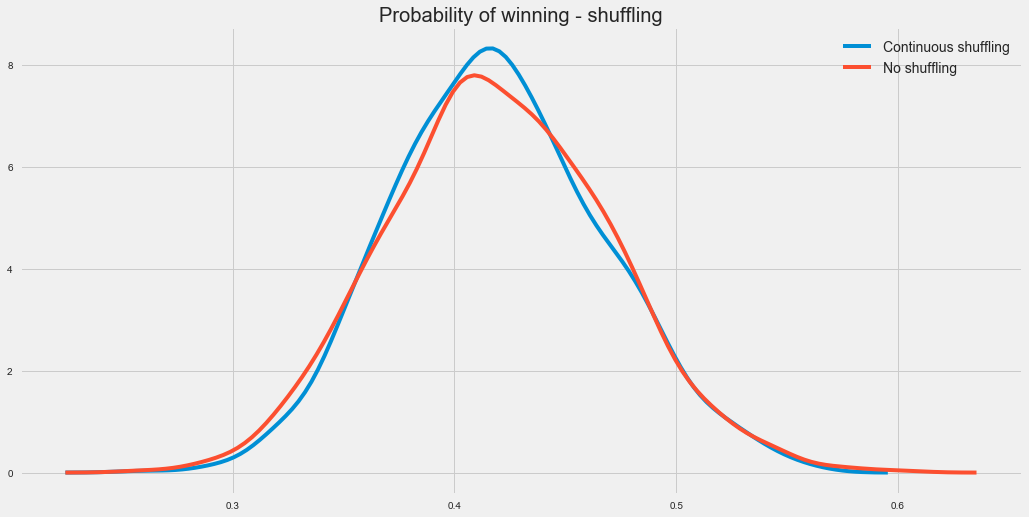

In [88]:
sns.distplot(con, hist=False, label="Continuous shuffling");
sns.distplot(nos, hist=False, label="No shuffling");
plt.title("Probability of winning - shuffling");

In [31]:
print ("Difference between continuous shuffling and no shuffling\n{}".format(stats.ttest_ind(con, nos)))

Difference between continuous shuffling and no shuffling
Ttest_indResult(statistic=-0.07730131551332689, pvalue=0.93839158428845149)


## Soft 17 vs All 17

In [22]:
stand = [get_win_p(df, soft=0) for _ in range(num_trials)]

In [23]:
soft = [get_win_p(df, soft=1) for _ in range(num_trials)]

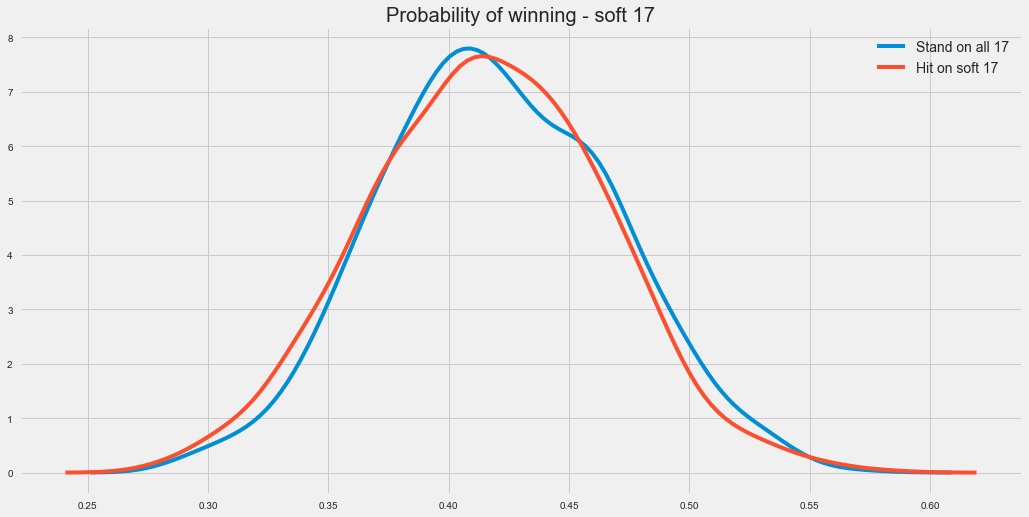

In [89]:
sns.distplot(stand, hist=False, label="Stand on all 17");
sns.distplot(soft, hist=False, label="Hit on soft 17");
plt.title("Probability of winning - soft 17");

In [33]:
print ("Difference between standing on all 17 and hitting on soft 17\n{}".format(stats.ttest_ind(stand, soft)))

Difference between standing on all 17 and hitting on soft 17
Ttest_indResult(statistic=1.930363949638549, pvalue=0.053703128793171545)


## Random strategy vs recommended strategy

In [26]:
ran = [get_win_p(df, strategy=0) for _ in range(num_trials)]

In [27]:
rec = [get_win_p(df, strategy=1) for _ in range(num_trials)]

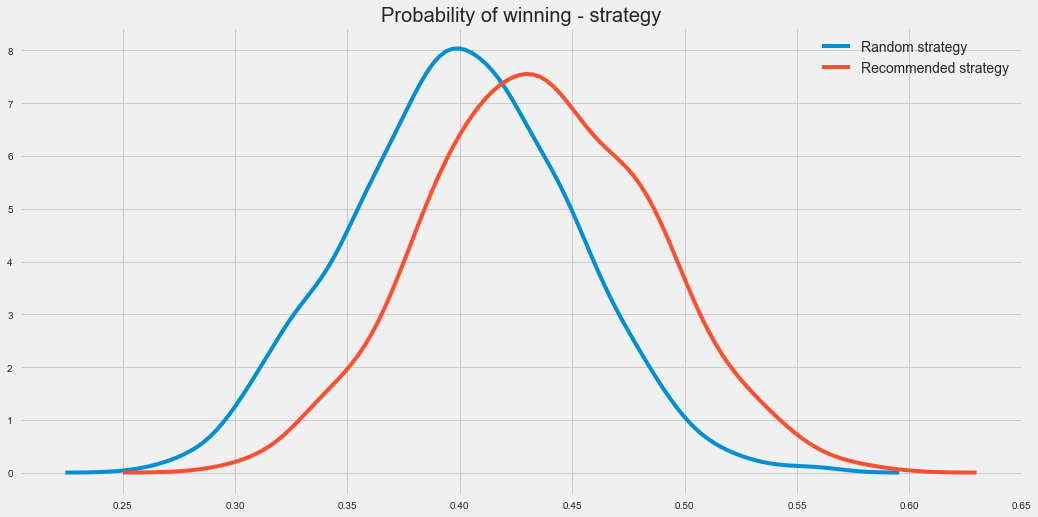

In [90]:
sns.distplot(ran, hist=False, label="Random strategy");
sns.distplot(rec, hist=False, label="Recommended strategy");
plt.title("Probability of winning - strategy");

In [34]:
print ("Difference between random and recommended strategy\n{}".format(stats.ttest_ind(ran, rec)))

Difference between random and recommended strategy
Ttest_indResult(statistic=-15.974122787350616, pvalue=3.7679578116281379e-54)


## Strategy and shuffling

In [35]:
ran_con = [get_win_p(df, strategy=0, game_type=0) for _ in range(num_trials)]

In [36]:
rec_con = [get_win_p(df, strategy=1, game_type=0) for _ in range(num_trials)]

In [37]:
ran_nos = [get_win_p(df, strategy=0, game_type=1) for _ in range(num_trials)]

In [38]:
rec_nos = [get_win_p(df, strategy=1, game_type=1) for _ in range(num_trials)]

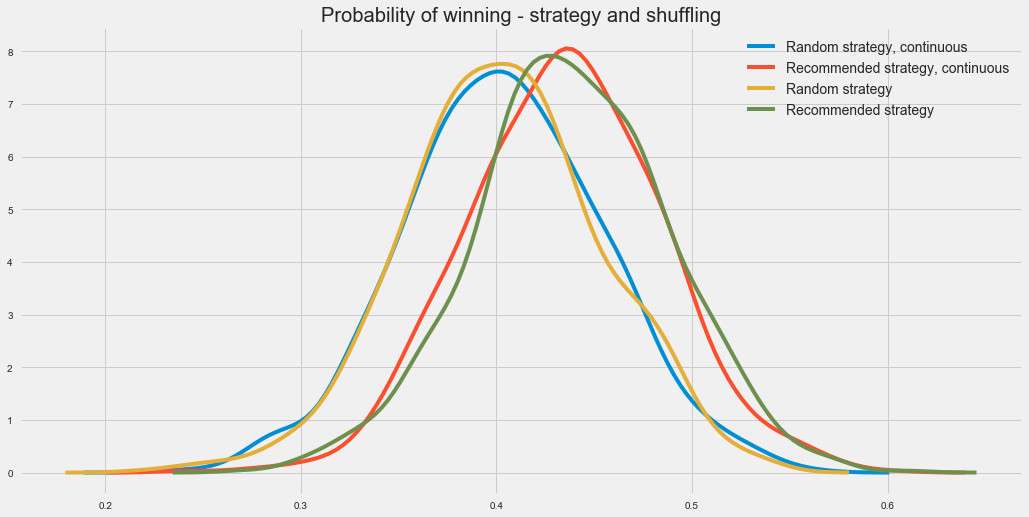

In [91]:
sns.distplot(ran_con, hist=False, label="Random strategy, continuous");
sns.distplot(rec_con, hist=False, label="Recommended strategy, continuous");
sns.distplot(ran_nos, hist=False, label="Random strategy");
sns.distplot(rec_nos, hist=False, label="Recommended strategy");
plt.title("Probability of winning - strategy and shuffling");

In [44]:
print ("Difference between shuffling types, random strategy\n{}\n".format(stats.ttest_ind(ran_con, ran_nos)))
print ("Difference between shuffling types, recommended strategy\n{}\n".format(stats.ttest_ind(rec_con, rec_nos)))
print ("Difference between strategies, continuous shuffling\n{}\n".format(stats.ttest_ind(rec_con, ran_con)))
print ("Difference between strategies, no shuffling\n{}\n".format(stats.ttest_ind(rec_nos, ran_nos)))

Difference between shuffling types, random strategy
Ttest_indResult(statistic=0.36030139426220426, pvalue=0.71865984046809683)

Difference between shuffling types, recommended strategy
Ttest_indResult(statistic=-1.4153760383341882, pvalue=0.15711411657529095)

Difference between strategies, continuous shuffling
Ttest_indResult(statistic=13.898208238268529, pvalue=5.4724479877572686e-42)

Difference between strategies, no shuffling
Ttest_indResult(statistic=15.69714526164735, pvalue=1.8846529423632408e-52)



## Strategy and soft 17

In [45]:
ran_all = [get_win_p(df, strategy=0, soft=0) for _ in range(num_trials)]

In [46]:
rec_all = [get_win_p(df, strategy=1, soft=0) for _ in range(num_trials)]

In [47]:
ran_soft = [get_win_p(df, strategy=0, soft=1) for _ in range(num_trials)]

In [48]:
rec_soft = [get_win_p(df, strategy=1, soft=1) for _ in range(num_trials)]

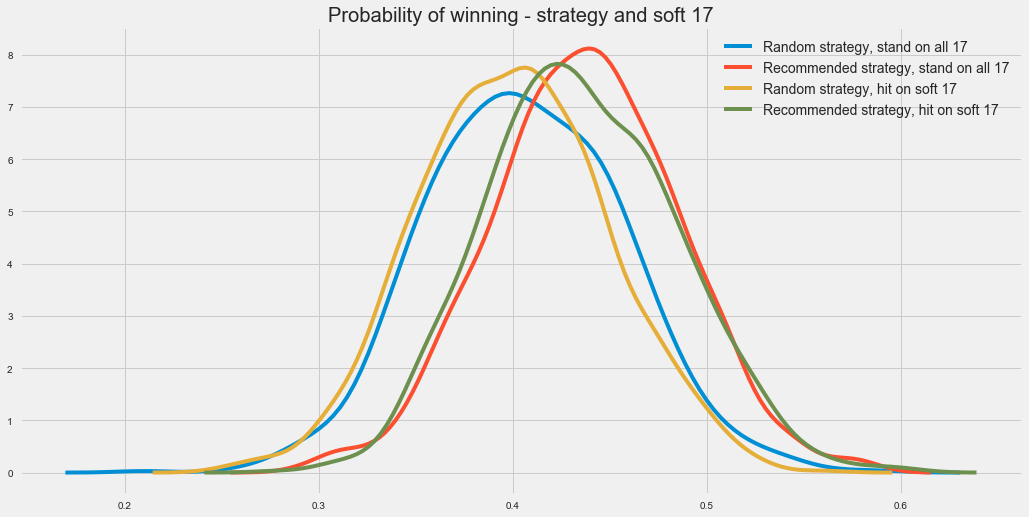

In [92]:
sns.distplot(ran_all, hist=False, label="Random strategy, stand on all 17");
sns.distplot(rec_all, hist=False, label="Recommended strategy, stand on all 17");
sns.distplot(ran_soft, hist=False, label="Random strategy, hit on soft 17");
sns.distplot(rec_soft, hist=False, label="Recommended strategy, hit on soft 17");
plt.title("Probability of winning - strategy and soft 17");

In [50]:
print ("Difference between standing and hitting, random strategy\n{}\n".format(stats.ttest_ind(ran_all, ran_soft)))
print ("Difference between standing and hitting, recommended strategy\n{}\n".format(stats.ttest_ind(rec_all, rec_soft)))
print ("Difference between strategies, stand on all 17\n{}\n".format(stats.ttest_ind(rec_all, ran_all)))
print ("Difference between strategies, hit on soft 17\n{}\n".format(stats.ttest_ind(rec_soft, ran_soft)))

Difference between standing and hitting, random strategy
Ttest_indResult(statistic=2.8375627694420826, pvalue=0.0045918196218793662)

Difference between standing and hitting, recommended strategy
Ttest_indResult(statistic=0.8483877299575221, pvalue=0.39632369979401827)

Difference between strategies, stand on all 17
Ttest_indResult(statistic=14.135189467666217, pvalue=2.6190052709106516e-43)

Difference between strategies, hit on soft 17
Ttest_indResult(statistic=16.46533403916527, pvalue=3.2142811595512434e-57)



## All three

In [52]:
ran_all_con = [get_win_p(df, strategy=0, soft=0, game_type=0) for _ in range(num_trials)]

In [53]:
ran_all_nos = [get_win_p(df, strategy=0, soft=0, game_type=1) for _ in range(num_trials)]

In [54]:
ran_soft_con = [get_win_p(df, strategy=0, soft=1, game_type=0) for _ in range(num_trials)]

In [55]:
ran_soft_nos = [get_win_p(df, strategy=0, soft=1, game_type=1) for _ in range(num_trials)]

In [56]:
rec_all_con = [get_win_p(df, strategy=1, soft=0, game_type=0) for _ in range(num_trials)]

In [57]:
rec_all_nos = [get_win_p(df, strategy=1, soft=0, game_type=1) for _ in range(num_trials)]

In [58]:
rec_soft_nos = [get_win_p(df, strategy=1, soft=1, game_type=1) for _ in range(num_trials)]

In [59]:
rec_soft_con = [get_win_p(df, strategy=1, soft=1, game_type=0) for _ in range(num_trials)]

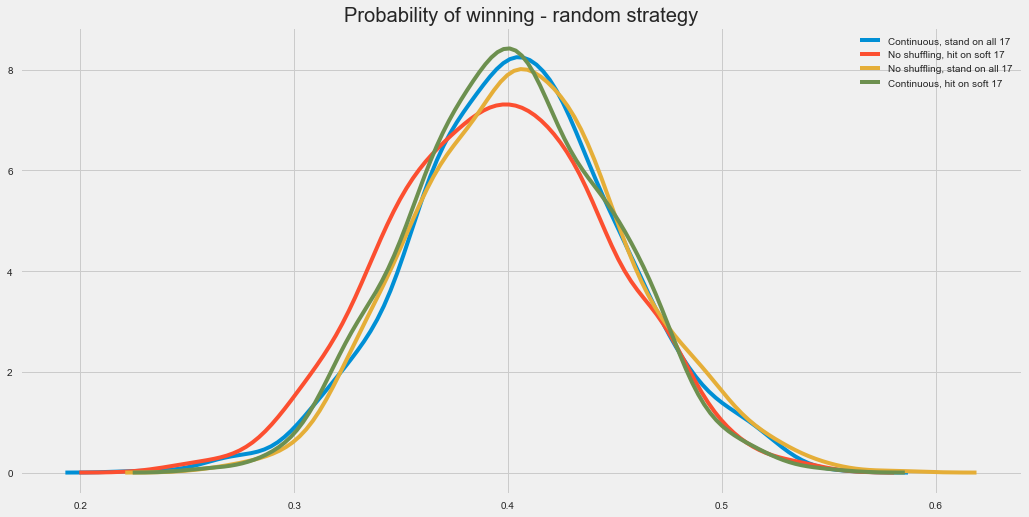

In [81]:
sns.distplot(ran_all_con, hist=False, label="Continuous, stand on all 17");
sns.distplot(ran_soft_nos, hist=False, label="No shuffling, hit on soft 17");
sns.distplot(ran_all_nos, hist=False, label="No shuffling, stand on all 17");
sns.distplot(ran_soft_con, hist=False, label="Continuous, hit on soft 17");
plt.title("Probability of winning - random strategy");

In [69]:
print ("Difference between standing and hitting, continuous shuffling\n{}\n".format(stats.ttest_ind(ran_all_con, ran_soft_con)))
print ("Difference between standing and hitting, no shuffling\n{}\n".format(stats.ttest_ind(ran_all_nos, ran_soft_nos)))
print ("Difference between shuffling, stand on all 17\n{}\n".format(stats.ttest_ind(ran_all_con, ran_all_nos)))
print ("Difference between no shuffling, hit on soft 17\n{}\n".format(stats.ttest_ind(ran_soft_con, ran_soft_nos)))
print ("Difference between shuffling+stand on all 17 and no shuffling+hit on soft 17\n{}\n".format(stats.ttest_ind(ran_all_con, ran_soft_con)))
print ("Difference between no shuffling+stand on all 17 and shuffling+hit on soft 17\n{}\n".format(stats.ttest_ind(ran_all_nos, ran_soft_nos)))

Difference between standing and hitting, continuous shuffling
Ttest_indResult(statistic=1.2002959551011001, pvalue=0.23016671342842859)

Difference between standing and hitting, no shuffling
Ttest_indResult(statistic=5.1665558919478247, pvalue=2.6218648605842961e-07)

Difference between shuffling, stand on all 17
Ttest_indResult(statistic=-1.3579705421311059, pvalue=0.17462636081423202)

Difference between no shuffling, hit on soft 17
Ttest_indResult(statistic=2.750024533597188, pvalue=0.0060127745108162958)

Difference between shuffling+stand on all 17 and no shuffling+hit on soft 17
Ttest_indResult(statistic=1.2002959551011001, pvalue=0.23016671342842859)

Difference between no shuffling+stand on all 17 and shuffling+hit on soft 17
Ttest_indResult(statistic=5.1665558919478247, pvalue=2.6218648605842961e-07)



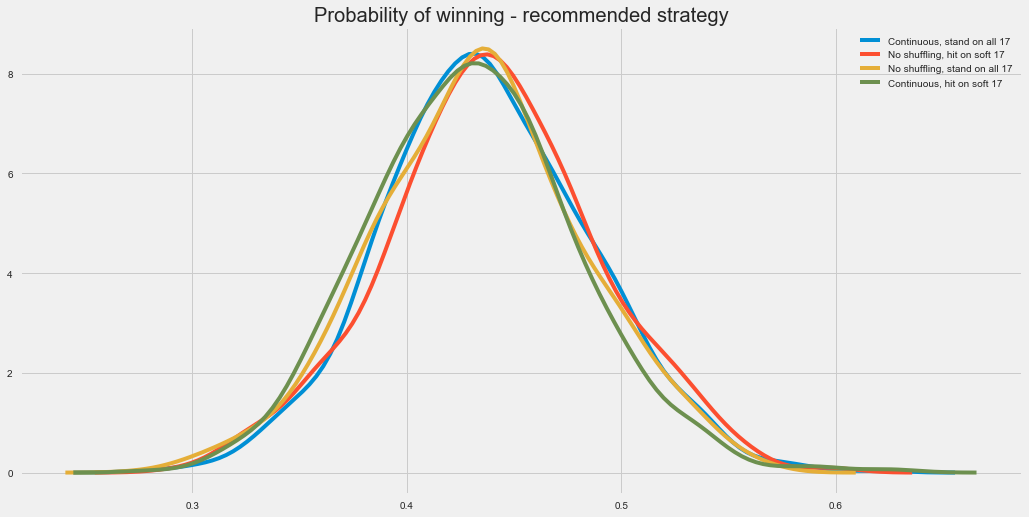

In [82]:
sns.distplot(rec_all_con, hist=False, label="Continuous, stand on all 17");
sns.distplot(rec_soft_nos, hist=False, label="No shuffling, hit on soft 17");
sns.distplot(rec_all_nos, hist=False, label="No shuffling, stand on all 17");
sns.distplot(rec_soft_con, hist=False, label="Continuous, hit on soft 17");
plt.title("Probability of winning - recommended strategy");

In [70]:
print ("Difference between standing and hitting, continuous shuffling\n{}\n".format(stats.ttest_ind(rec_all_con, rec_soft_con)))
print ("Difference between standing and hitting, no shuffling\n{}\n".format(stats.ttest_ind(rec_all_nos, rec_soft_nos)))
print ("Difference between shuffling, stand on all 17\n{}\n".format(stats.ttest_ind(rec_all_con, rec_all_nos)))
print ("Difference between no shuffling, hit on soft 17\n{}\n".format(stats.ttest_ind(rec_soft_con, rec_soft_nos)))
print ("Difference between shuffling+stand on all 17 and no shuffling+hit on soft 17\n{}\n".format(stats.ttest_ind(rec_all_con, rec_soft_con)))
print ("Difference between no shuffling+stand on all 17 and shuffling+hit on soft 17\n{}\n".format(stats.ttest_ind(rec_all_nos, rec_soft_nos)))

Difference between standing and hitting, continuous shuffling
Ttest_indResult(statistic=3.1229883589301823, pvalue=0.0018159093177139332)

Difference between standing and hitting, no shuffling
Ttest_indResult(statistic=-2.7579649088638383, pvalue=0.0058691994120756178)

Difference between shuffling, stand on all 17
Ttest_indResult(statistic=1.8096872314599703, pvalue=0.070494511970600415)

Difference between no shuffling, hit on soft 17
Ttest_indResult(statistic=-4.0530714557534555, pvalue=5.2486041204391927e-05)

Difference between shuffling+stand on all 17 and no shuffling+hit on soft 17
Ttest_indResult(statistic=3.1229883589301823, pvalue=0.0018159093177139332)

Difference between no shuffling+stand on all 17 and shuffling+hit on soft 17
Ttest_indResult(statistic=-2.7579649088638383, pvalue=0.0058691994120756178)



# How often does the dealer have to hit?

- Ignore player's hand
    - Dealer has to hit if he has below 17
    - Sometimes dealer has to hit if he has a soft 17
        - Depends on casino

In [8]:
def need_to_hit(data, num_games=100, soft=0):
    choices = [i for i in data.index]
    games = data.copy()
    games = games.ix[np.random.choice(choices, size=num_games)]
    below = sum(games.d_initial < 17)
    if soft == 1:
        all_17 = games.d_hand[games.d_initial == 17]
        for i in all_17:
            if soft_17(i):
                below += 1
    return below/num_games

## When the dealer is not required to hit on soft 17

## When the dealer is required to hit on soft 17

# Distribution of dealer's points

- We're interested in before and after the dealer hits

## Initial points

- How often does the dealer get dealt a hand that's 18, 19, 20 or 21?

In [18]:
def get_hand_games(data, col, point, num_games=100):
    all_points = data[col]
    games = np.random.choice(all_points, size=num_games)
    return sum(games == point)/num_games

In [19]:
dist_18 = [get_hand_games(df, "d_initial", 18) for _ in range(1000)]
dist_19 = [get_hand_games(df, "d_initial", 19) for _ in range(1000)]
dist_20 = [get_hand_games(df, "d_initial", 20) for _ in range(1000)]
dist_21 = [get_hand_games(df, "d_initial", 21) for _ in range(1000)]

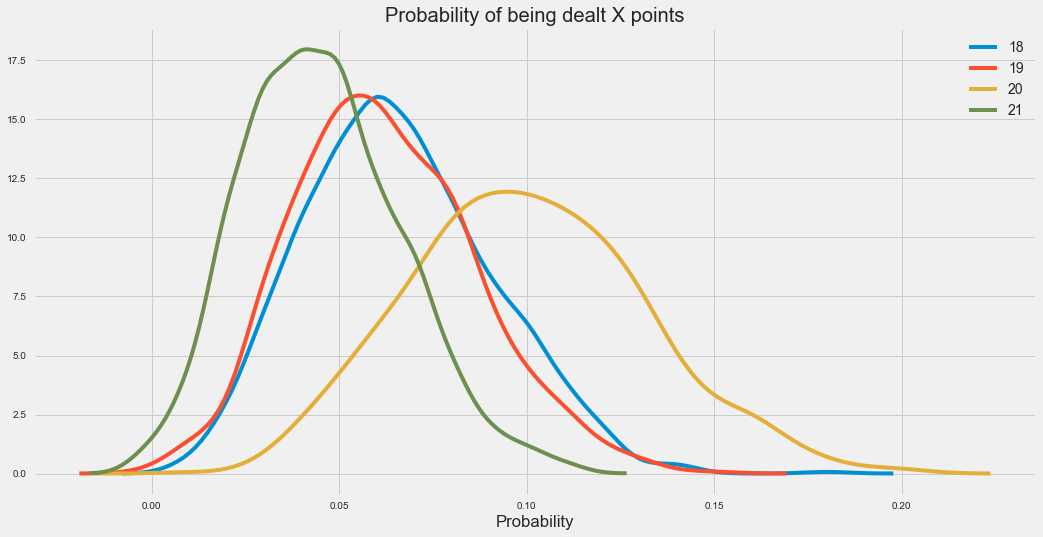

In [20]:
sns.distplot(dist_18, hist=False, label=18);
sns.distplot(dist_19, hist=False, label=19);
sns.distplot(dist_20, hist=False, label=20);
sns.distplot(dist_21, hist=False, label=21);
plt.title("Probability of being dealt X points");
plt.xlabel("Probability");

## Final points

- How often does the dealer end up with a hand that's 18, 19, 20 or 21?

In [21]:
dist_f18 = [get_hand_games(df, "d_final", 18) for _ in range(1000)]
dist_f19 = [get_hand_games(df, "d_final", 19) for _ in range(1000)]
dist_f20 = [get_hand_games(df, "d_final", 20) for _ in range(1000)]
dist_f21 = [get_hand_games(df, "d_final", 21) for _ in range(1000)]

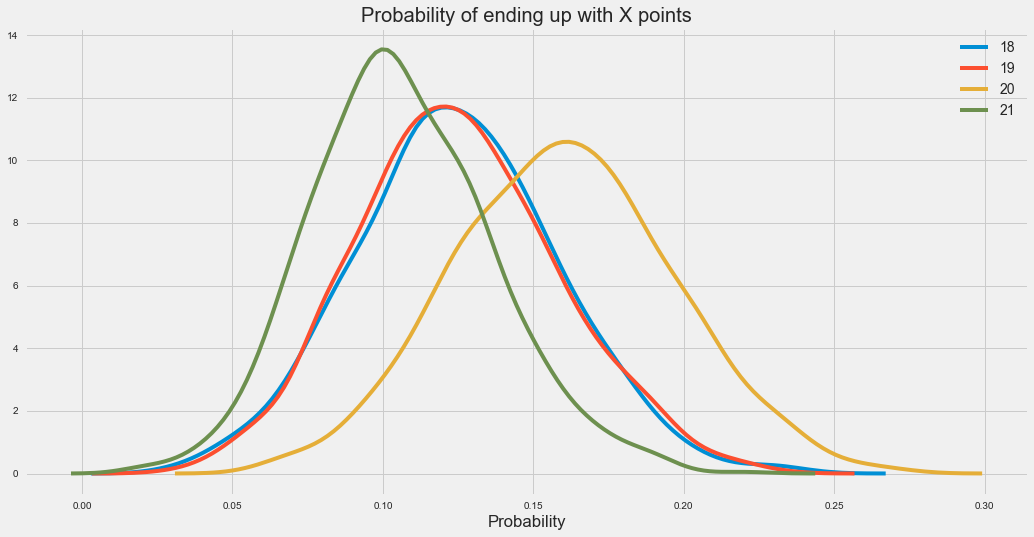

In [22]:
sns.distplot(dist_f18, hist=False, label=18);
sns.distplot(dist_f19, hist=False, label=19);
sns.distplot(dist_f20, hist=False, label=20);
sns.distplot(dist_f21, hist=False, label=21);
plt.title("Probability of ending up with X points");
plt.xlabel("Probability");

# Distribution of player's points

## Initial points

- How often does the player get dealt a hand that's 18, 19, 20 or 21?

In [23]:
distp_18 = [get_hand_games(df, "p_initial", 18) for _ in range(1000)]
distp_19 = [get_hand_games(df, "p_initial", 19) for _ in range(1000)]
distp_20 = [get_hand_games(df, "p_initial", 20) for _ in range(1000)]
distp_21 = [get_hand_games(df, "p_initial", 21) for _ in range(1000)]

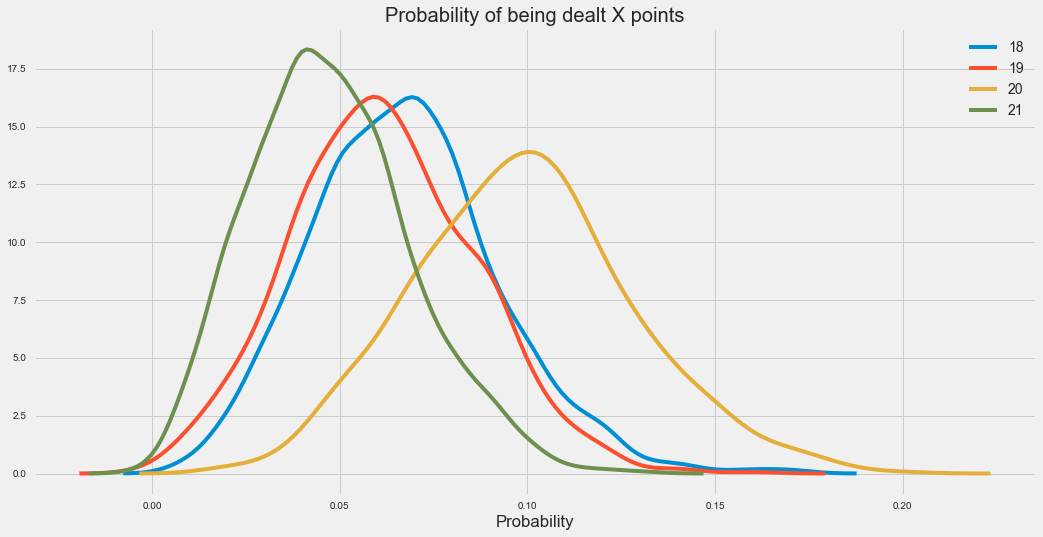

In [24]:
sns.distplot(distp_18, hist=False, label=18);
sns.distplot(distp_19, hist=False, label=19);
sns.distplot(distp_20, hist=False, label=20);
sns.distplot(distp_21, hist=False, label=21);
plt.title("Probability of being dealt X points");
plt.xlabel("Probability");

## Final points

- How often does the player end up with a hand that's 18, 19, 20 or 21?

In [25]:
distp_f18 = [get_hand_games(df, "p_final", 18) for _ in range(1000)]
distp_f19 = [get_hand_games(df, "p_final", 19) for _ in range(1000)]
distp_f20 = [get_hand_games(df, "p_final", 20) for _ in range(1000)]
distp_f21 = [get_hand_games(df, "p_final", 21) for _ in range(1000)]

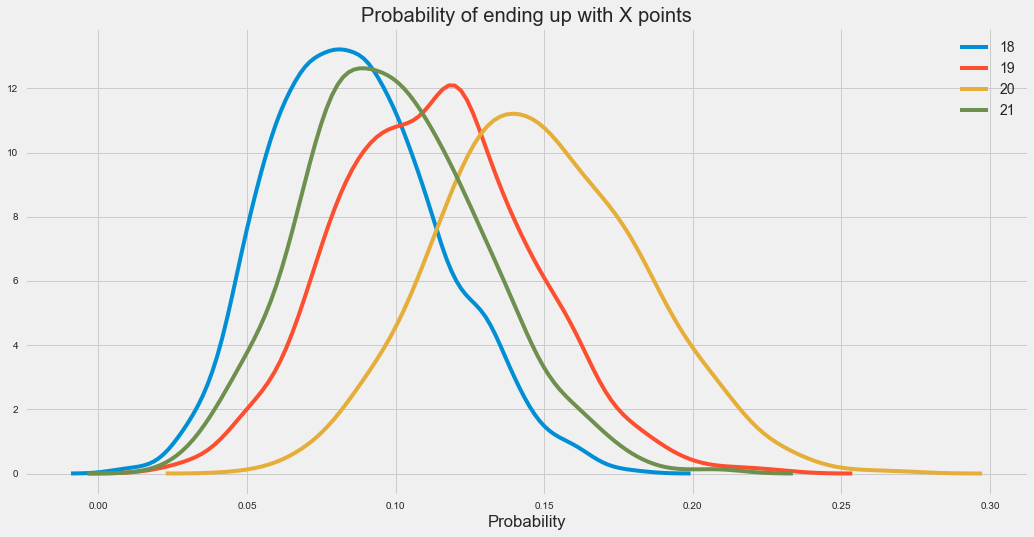

In [26]:
sns.distplot(distp_f18, hist=False, label=18);
sns.distplot(distp_f19, hist=False, label=19);
sns.distplot(distp_f20, hist=False, label=20);
sns.distplot(distp_f21, hist=False, label=21);
plt.title("Probability of ending up with X points");
plt.xlabel("Probability");

# Comparing dealer and player

## Initial points

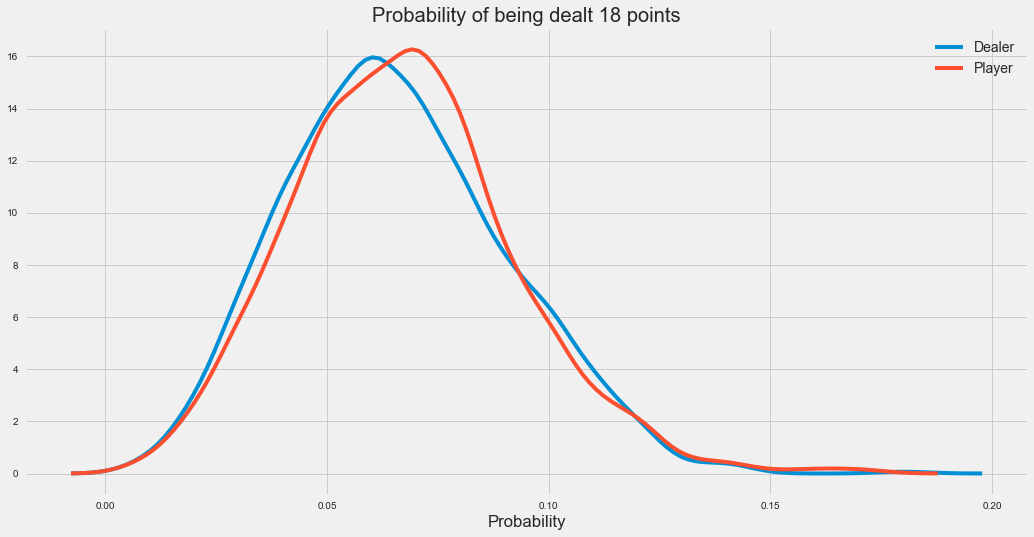

In [27]:
sns.distplot(dist_18, hist=False, label="Dealer");
sns.distplot(distp_18, hist=False, label="Player");
plt.title("Probability of being dealt {} points".format(18));
plt.xlabel("Probability");

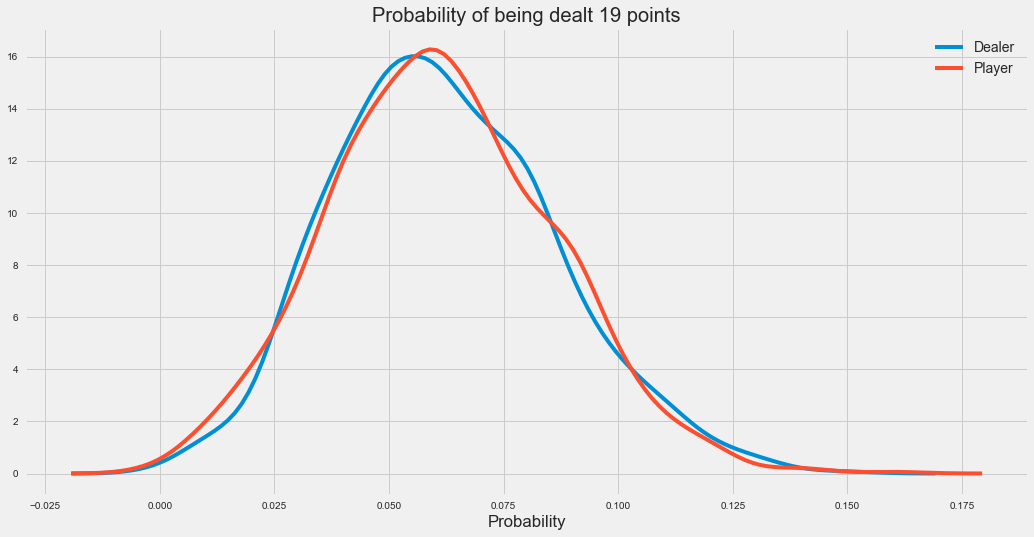

In [28]:
sns.distplot(dist_19, hist=False, label="Dealer");
sns.distplot(distp_19, hist=False, label="Player");
plt.title("Probability of being dealt {} points".format(19));
plt.xlabel("Probability");

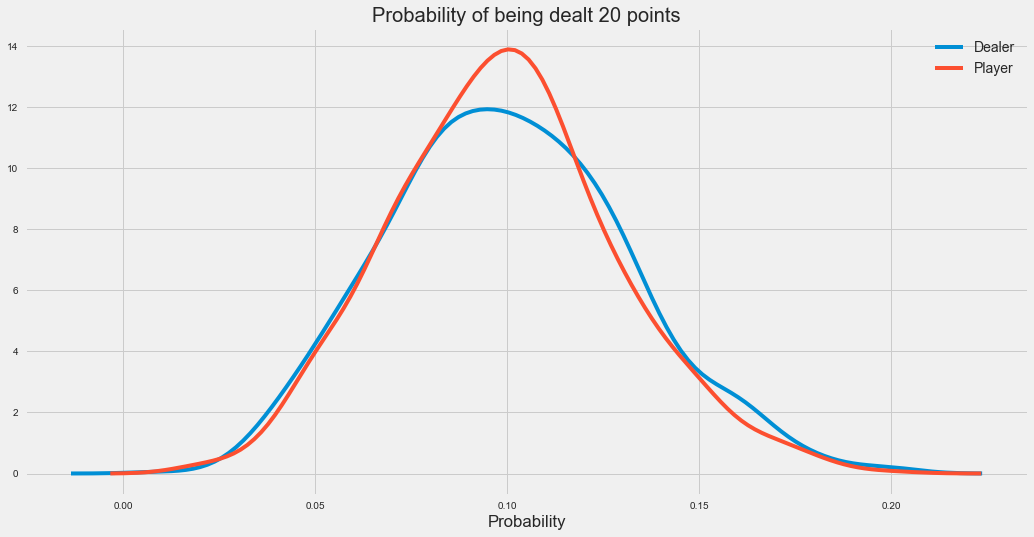

In [29]:
sns.distplot(dist_20, hist=False, label="Dealer");
sns.distplot(distp_20, hist=False, label="Player");
plt.title("Probability of being dealt {} points".format(20));
plt.xlabel("Probability");

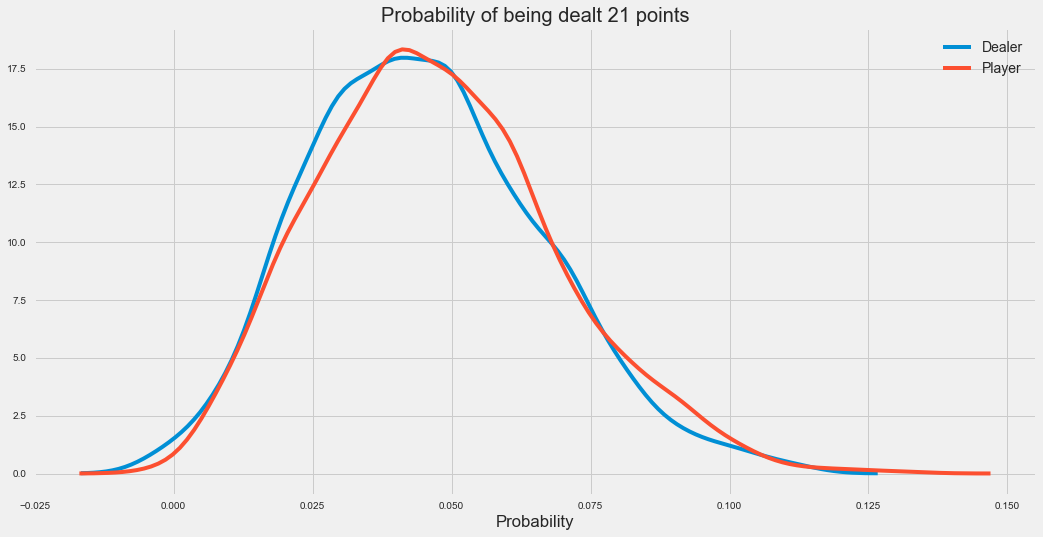

In [30]:
sns.distplot(dist_21, hist=False, label="Dealer");
sns.distplot(distp_21, hist=False, label="Player");
plt.title("Probability of being dealt {} points".format(21));
plt.xlabel("Probability");

## Final points

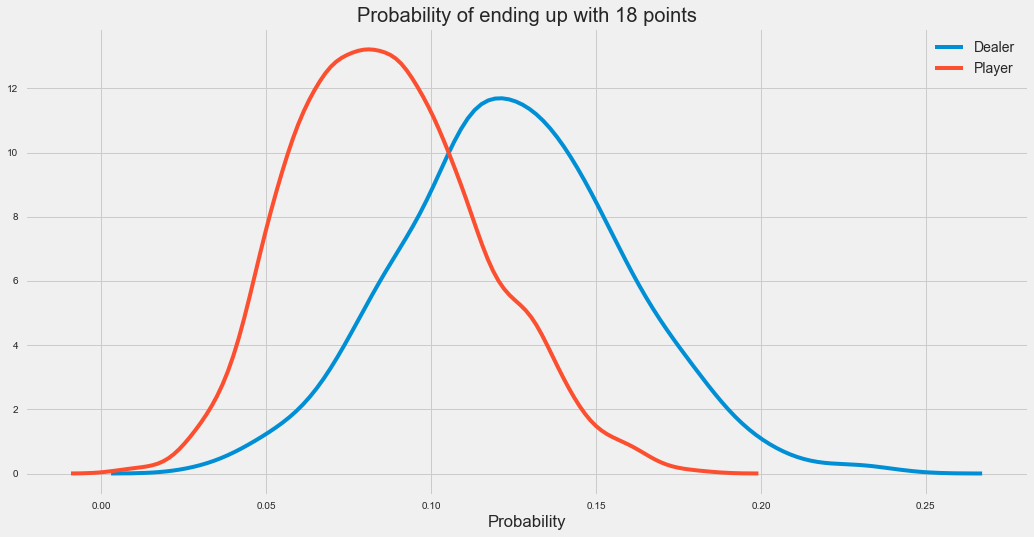

In [31]:
sns.distplot(dist_f18, hist=False, label="Dealer");
sns.distplot(distp_f18, hist=False, label="Player");
plt.title("Probability of ending up with {} points".format(18));
plt.xlabel("Probability");

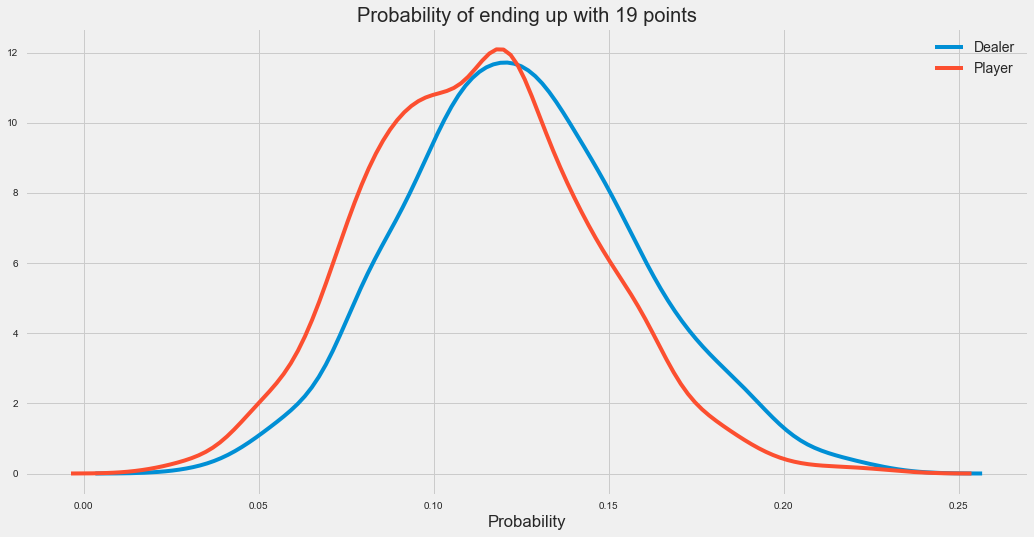

In [32]:
sns.distplot(dist_f19, hist=False, label="Dealer");
sns.distplot(distp_f19, hist=False, label="Player");
plt.title("Probability of ending up with {} points".format(19));
plt.xlabel("Probability");

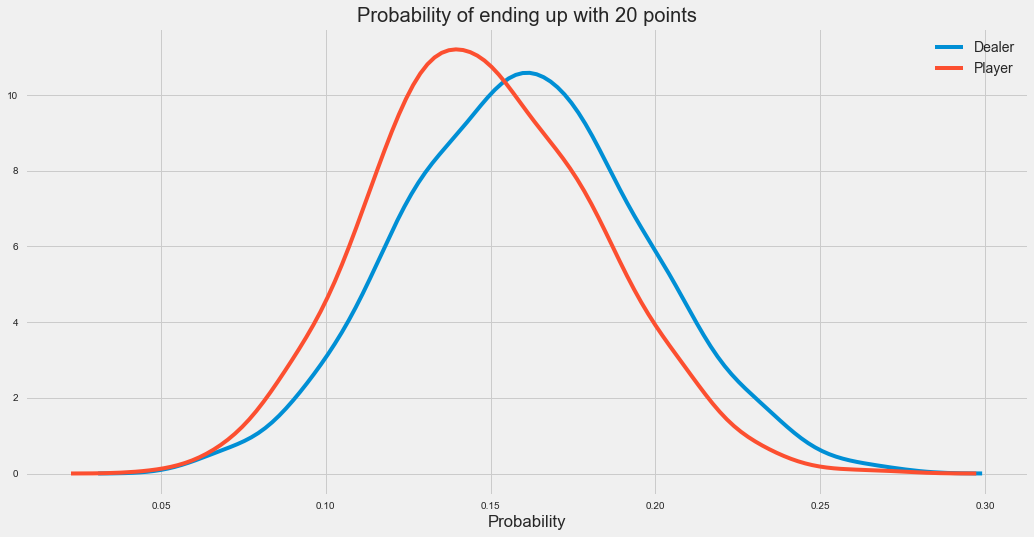

In [33]:
sns.distplot(dist_f20, hist=False, label="Dealer");
sns.distplot(distp_f20, hist=False, label="Player");
plt.title("Probability of ending up with {} points".format(20));
plt.xlabel("Probability");

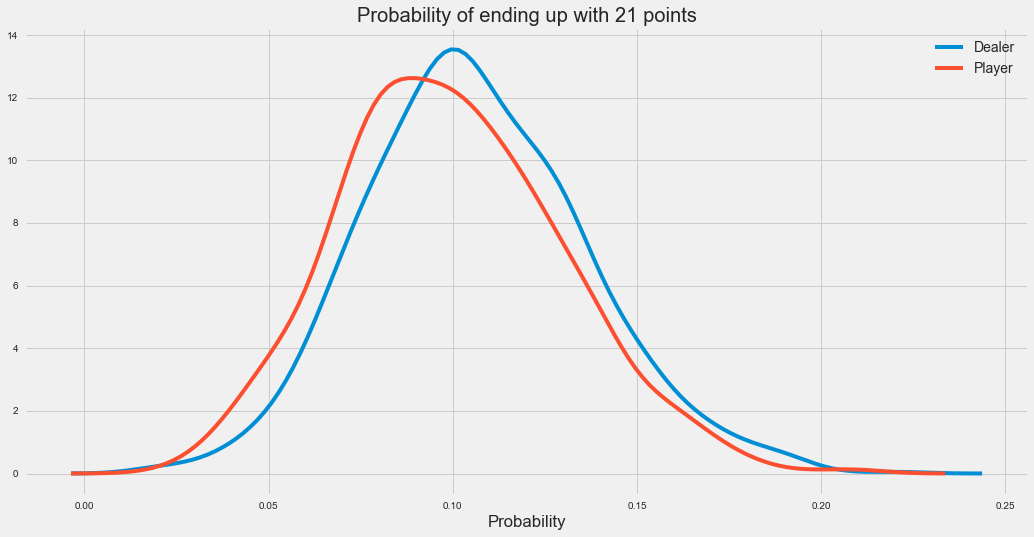

In [34]:
sns.distplot(dist_f21, hist=False, label="Dealer");
sns.distplot(distp_f21, hist=False, label="Player");
plt.title("Probability of ending up with {} points".format(21));
plt.xlabel("Probability");

# Do you do better splitting on 8s?

In [35]:
rec = df.copy()
rec = rec[rec.strategy == 1]

In [36]:
def double_8(s):
    l = s.split(",")
    new_l = []
    for i in l:
        try:
            new_l.append(int(i))
        except:
            new_l.append(i)
    if new_l[0] == 8 and new_l[1] == 8:
        out = True
    else:
        out = False
    return int(out)

In [37]:
rec["double_8"] = rec.p_hand.apply(double_8)

In [38]:
double = rec[(rec.split==1) | (rec.double_8==1)]

In [39]:
def get_d_trials(data, split=0, num_games=100):
    results = data.p_win[data.split==split]
    out = np.random.choice(results, size=num_games)
    return sum(out)/num_games

In [41]:
split_8 = [get_d_trials(rec, split=1) for _ in range(1000)]
no_split = [get_d_trials(rec, split=0) for _ in range(1000)]

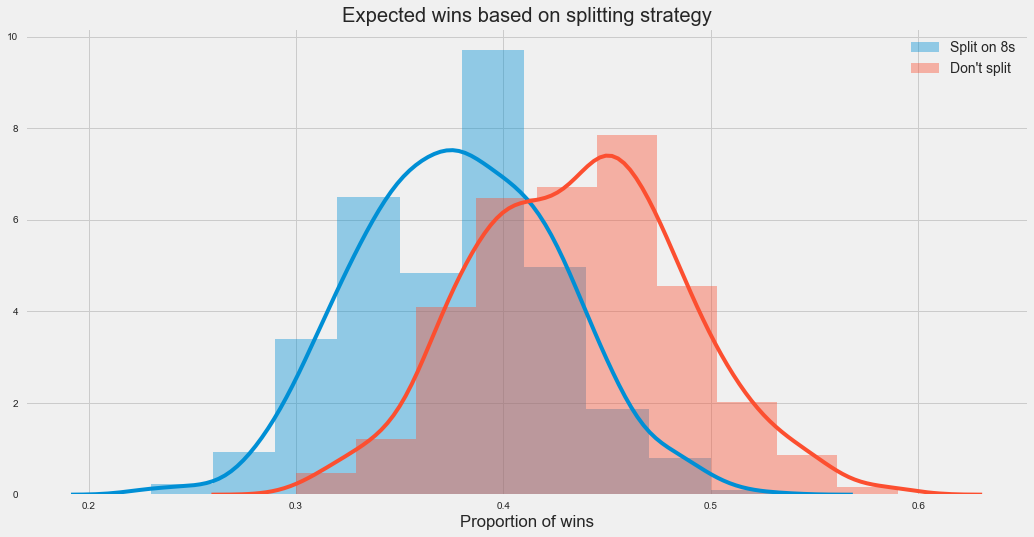

In [42]:
sns.distplot(split_8, bins=10, label="Split on 8s");
sns.distplot(no_split, bins=10, label="Don't split");
plt.xlabel("Proportion of wins");
plt.legend();
plt.title("Expected wins based on splitting strategy");

In [43]:
np.mean(split_8)

0.37823000000000001

In [44]:
np.mean(no_split)

0.43605000000000005

In [45]:
# Looks like we're no better splitting on the 8s
stats.ttest_ind(split_8, no_split)

Ttest_indResult(statistic=-26.040303876762444, pvalue=5.8820055084690277e-129)

- It looks like we're not doing any better splitting on 8s, which also means we're not worse off when you have one 8 versus two.
- If you split, you end up with 2 hands, and both have the same chance of winning as your first hand of double 8s
    - You increase your total chance of winning because instead of one hand, you now have 2

# Do you do better splitting on any doubles?

- Let's also compare it to a normal hand that contains that card

In [46]:
def double_cards(s):
    l = s.split(",")
    new_l = []
    for i in l:
        try:
            new_l.append(int(i))
        except:
            new_l.append(i)
    if new_l[0] == new_l[1]:
        out = True
    else:
        out = False
    return int(out)

In [47]:
doubles = df.copy()
doubles["doubles"] = doubles.p_hand.apply(double_cards)

In [48]:
doubles["card_one"] = doubles.p_hand.apply(lambda x: x.split(",")[0])
doubles["card_two"] = doubles.p_hand.apply(lambda x: x.split(",")[1])

In [49]:
doubles.head()

,d_hand,d_final_hand,p_hand,p_final_hand,strategy,split,num_decks,soft_17,game_type,d_open,...,d_hit,d_bust,p_initial,p_final,p_hit,p_bust,p_win,doubles,card_one,card_two
0,"K,Q","K,Q","10,4","10,4,10",0,0,4,0,0,10,...,0,0,14,24,1,1,0,0,10,4
1,"4,10","4,10,10","7,9","7,9",0,0,4,1,0,4,...,1,1,16,16,0,0,1,0,7,9
2,"10,J","10,J","3,3","3,3,3,K",1,0,4,1,0,10,...,0,0,6,19,1,0,0,1,3,3
3,"K,K","K,K","A,J","A,J",1,0,4,0,0,10,...,0,0,21,21,0,0,1,0,A,J
4,"2,Q","2,Q,3,9","6,2","6,2,5",1,0,4,1,0,2,...,1,1,8,13,1,0,1,0,6,2


## Double aces

In [50]:
aces = doubles[doubles.card_one=="A"]

In [55]:
def plot_splits(split_d, no_split, normal):
    sns.distplot(split_d, bins=10, label="Split on doubles");
    sns.distplot(no_split, bins=10, label="Don't split");
    sns.distplot(normal, bins=10, label="Non-double");
    plt.xlabel("Proportion of wins");
    plt.legend();
    plt.title("Expected wins based on splitting strategy");
    plt.show();

In [52]:
def split_sep(df, card_one):
    split = [get_d_trials(df[(df.doubles==1) & (df.split==1) & (df.card_one==card_one)], split=1) for _ in range(2000)]
    no_split = [get_d_trials(df[(df.doubles==1) & (df.split==0) & (df.card_one==card_one)], split=0) for _ in range(2000)]
    normal = [get_d_trials(df[(df.doubles==0) & (df.split==0) & 
                              ((df.card_one==card_one) | (df.card_two==card_one))], split=0) for _ in range(2000)]
    return split, no_split, normal

In [64]:
def analyse_card(df, card_one, sig=0.05):
    s, ns, normal = split_sep(df, card_one)
    plot_splits(s, ns, normal)
    
    _, pval = stats.ttest_ind(s, ns)
    is_sig = pval < sig
    if np.mean(s) > np.mean(ns):
        msg = "Splitting is better."
        
        if is_sig:
            print ("'Significant' difference in winning rate between splitting and not splitting double {}s.\nP-value: {}\n{}\n".format(card_one, pval, msg))
        else:
            print ("No 'significant' difference in winning rate between splitting and not splitting double {}s.\nP-value: {}\n".format(pval, msg))

        _, pval = stats.ttest_ind(s, normal)
        is_sig = pval < sig
        if np.mean(s) > np.mean(normal):
            msg = "You do better after a split."
        else:
            msg = "You do better on a normal hand."

        if is_sig:
            print ("'Significant' difference in winning rate between splitting and a normal hand.\nP-value: {}\n{}\n".format(pval, msg))
        else:
            print ("No 'significant' difference in winning rate between splitting and a normal hand.\nP-value: {}\n".format(pval))

    else:
        msg = "Not splitting is better."
        if is_sig:
            print ("'Significant' difference in winning rate between splitting and not splitting double {}s.\nP-value: {}\n{}\n".format(card_one, pval, msg))
        else:
            print ("No 'significant' difference in winning rate between splitting and not splitting double {}s.\nP-value: {}\n".format(pval, msg))

        _, pval = stats.ttest_ind(ns, normal)
        is_sig = pval < sig
        if np.mean(ns) > np.mean(normal):
            msg = "You do better not splitting on a double."
        else:
            msg = "You do better on a normal hand."

        if is_sig:
            print ("'Significant' difference in winning rate between not splitting and a normal hand.\nP-value: {}\n{}".format(pval, msg))
        else:
            print ("No 'significant' difference in winning rate between not splitting and a normal hand.\nP-value: {}".format(pval))

- $H_0$: There is no difference in winning rates
- $H_1$: There is a difference in winning rates

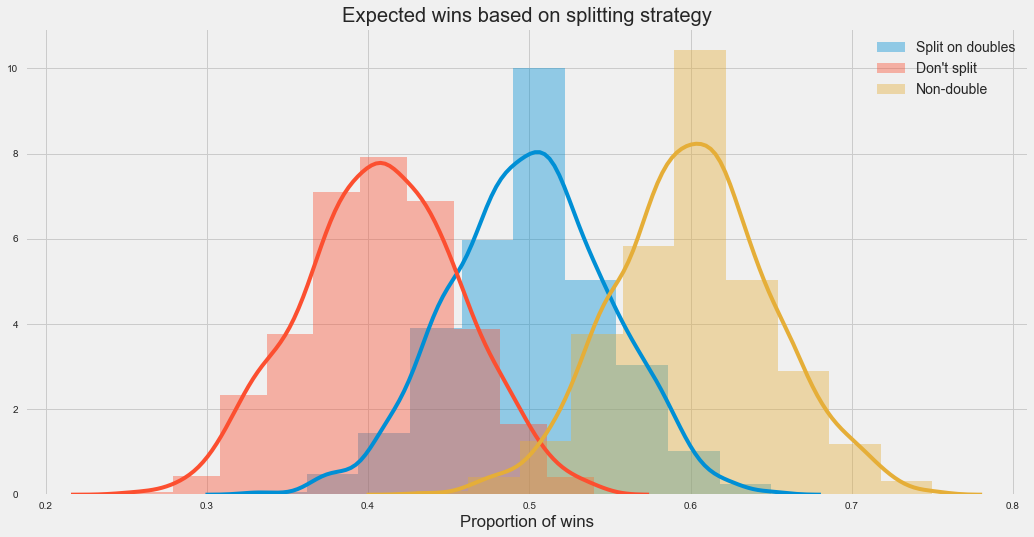

'Significant' difference in winning rate between splitting and not splitting double As.
P-value: 0.0
Splitting is better.

'Significant' difference in winning rate between splitting and a normal hand.
P-value: 0.0
You do better on a normal hand.



In [65]:
analyse_card(doubles, "A", 0.05)

/Users/joce/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/joce/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


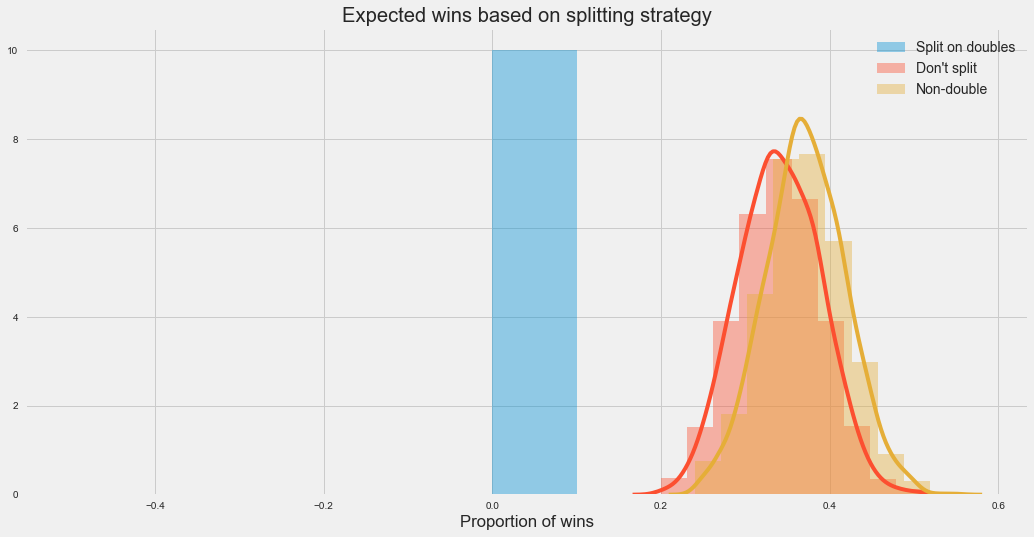

'Significant' difference in winning rate between splitting and not splitting double 2s.
P-value: 0.0
Not splitting is better.

'Significant' difference in winning rate between not splitting and a normal hand.
P-value: 1.1226052548375236e-86
You do better on a normal hand.


In [66]:
analyse_card(doubles, "2")

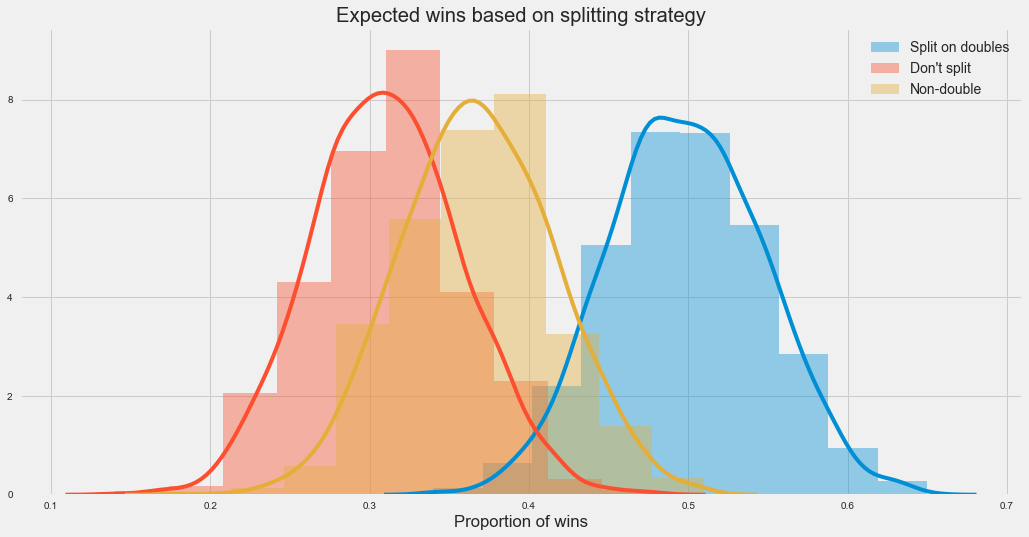

'Significant' difference in winning rate between splitting and not splitting double 3s.
P-value: 0.0
Splitting is better.

'Significant' difference in winning rate between splitting and a normal hand.
P-value: 0.0
You do better after a split.



In [67]:
analyse_card(doubles, "3")

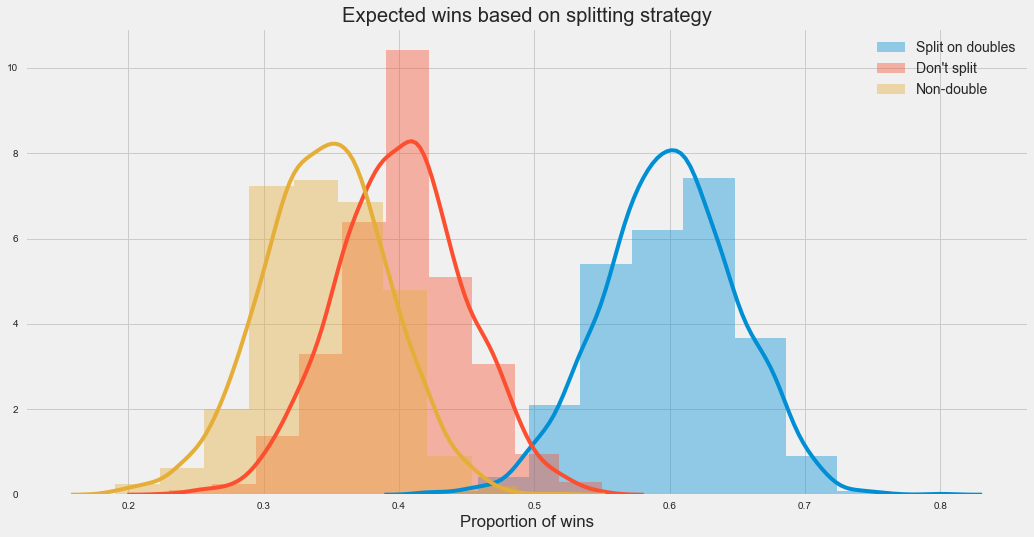

'Significant' difference in winning rate between splitting and not splitting double 4s.
P-value: 0.0
Splitting is better.

'Significant' difference in winning rate between splitting and a normal hand.
P-value: 0.0
You do better after a split.



In [68]:
analyse_card(doubles, "4")

/Users/joce/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/joce/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


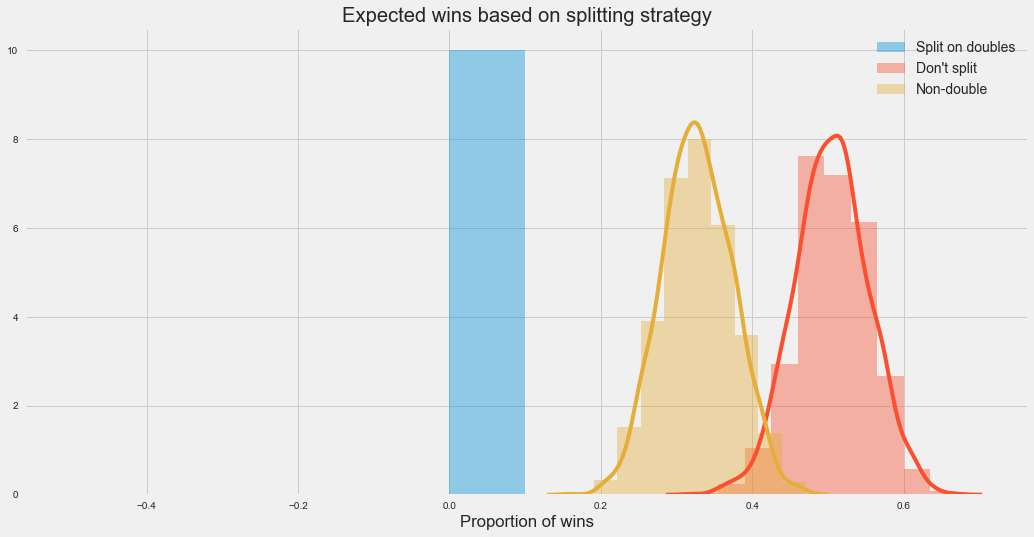

'Significant' difference in winning rate between splitting and not splitting double 5s.
P-value: 0.0
Not splitting is better.

'Significant' difference in winning rate between not splitting and a normal hand.
P-value: 0.0
You do better not splitting on a double.


In [69]:
analyse_card(doubles, "5")

/Users/joce/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/joce/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


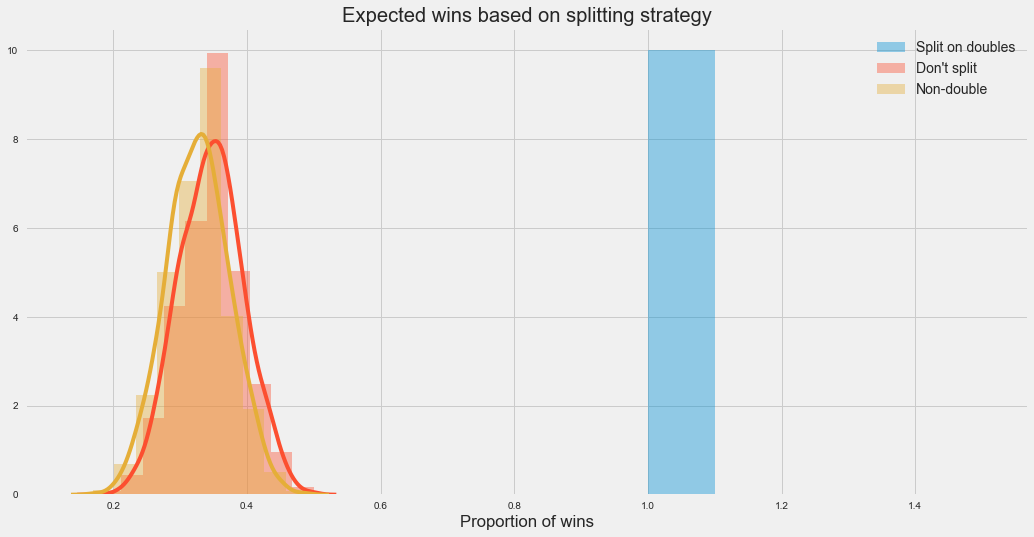

'Significant' difference in winning rate between splitting and not splitting double 6s.
P-value: 0.0
Splitting is better.

'Significant' difference in winning rate between splitting and a normal hand.
P-value: 0.0
You do better after a split.



In [70]:
analyse_card(doubles, "6")

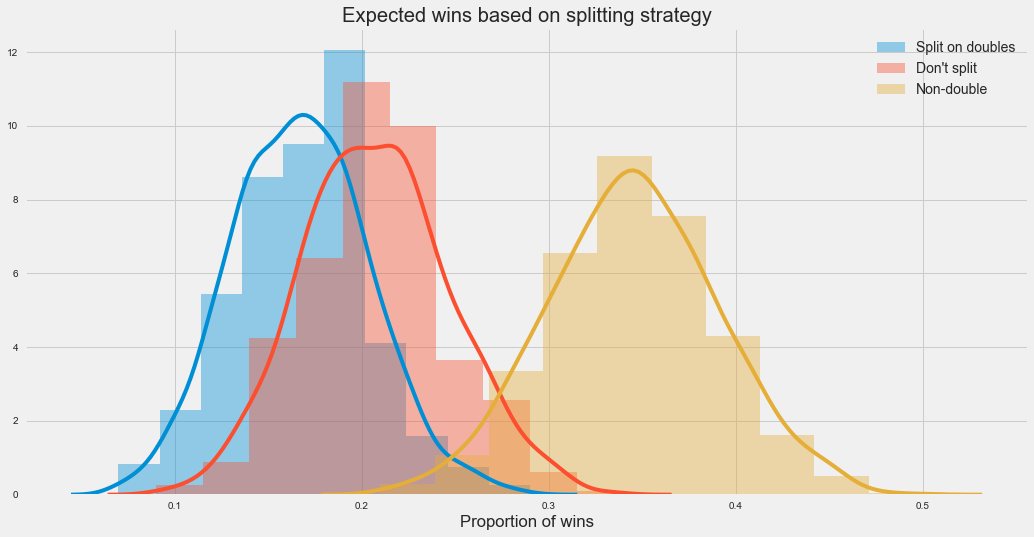

'Significant' difference in winning rate between splitting and not splitting double 7s.
P-value: 1.0419013852152236e-217
Not splitting is better.

'Significant' difference in winning rate between not splitting and a normal hand.
P-value: 0.0
You do better on a normal hand.


In [71]:
analyse_card(doubles, "7")

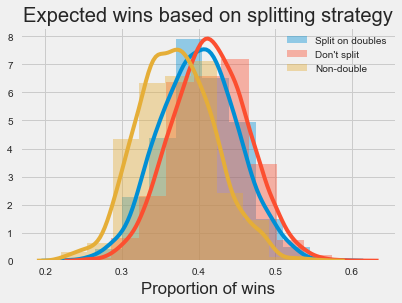

'Significant' difference in winning rate between splitting and not splitting double 8s.
P-value: 0.0
Splitting is better.

'Significant' difference in winning rate between splitting and a normal hand.
P-value: 2.459537415276692e-74
You do better after a split.

'Significant' difference in winning rate between not splitting and a normal hand.
P-value: 1.5022489526174398e-177
You do better on a normal hand.


In [134]:
analyse_card(doubles, "8")

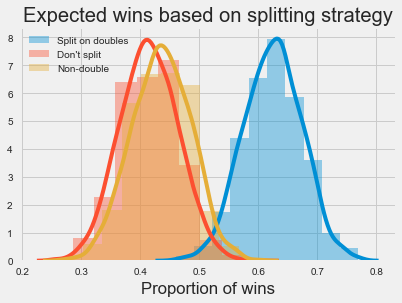

'Significant' difference in winning rate between splitting and not splitting double 9s.
P-value: 0.0
Splitting is better.

'Significant' difference in winning rate between splitting and a normal hand.
P-value: 0.0
You do better after a split.

'Significant' difference in winning rate between not splitting and a normal hand.
P-value: 0.0
You do better on a normal hand.


In [135]:
analyse_card(doubles, "9")

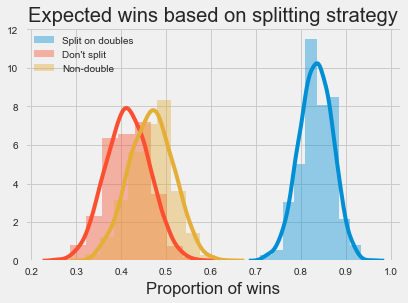

'Significant' difference in winning rate between splitting and not splitting double 10s.
P-value: 0.0
Splitting is better.

'Significant' difference in winning rate between splitting and a normal hand.
P-value: 0.0
You do better after a split.

'Significant' difference in winning rate between not splitting and a normal hand.
P-value: 0.0
You do better not splitting on a double.


In [136]:
analyse_card(doubles, "10")

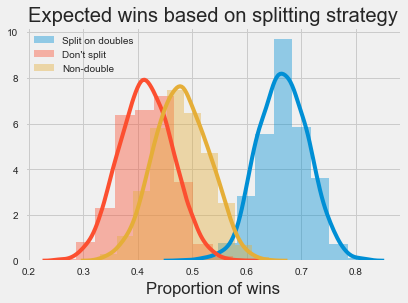

'Significant' difference in winning rate between splitting and not splitting double Js.
P-value: 3.072781392662407e-51
Not splitting is better.

'Significant' difference in winning rate between splitting and a normal hand.
P-value: 0.0
You do better after a split.

'Significant' difference in winning rate between not splitting and a normal hand.
P-value: 0.0
You do better not splitting on a double.


In [137]:
analyse_card(doubles, "J")

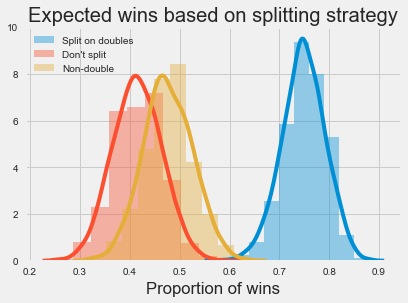

'Significant' difference in winning rate between splitting and not splitting double Qs.
P-value: 0.04055636897064476
Splitting is better.

'Significant' difference in winning rate between splitting and a normal hand.
P-value: 0.0
You do better after a split.

'Significant' difference in winning rate between not splitting and a normal hand.
P-value: 0.0
You do better not splitting on a double.


In [138]:
analyse_card(doubles, "Q")

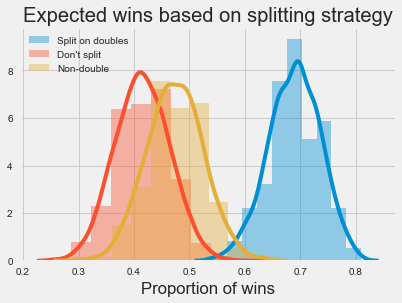

'Significant' difference in winning rate between splitting and not splitting double Ks.
P-value: 0.0010391240475270797
Splitting is better.

'Significant' difference in winning rate between splitting and a normal hand.
P-value: 0.0
You do better after a split.

'Significant' difference in winning rate between not splitting and a normal hand.
P-value: 0.0
You do better not splitting on a double.


In [139]:
analyse_card(doubles, "K")

## Dealer points

- Safe
    - Dealer has to hit, but he will not bust with one card
- Hit
    - Dealer has to hit and there's a chance he will bust with one card
- Stand
    - Dealer does not have to hit

# Questions

## When the dealer is in the safe zone, how often does he bust?

## When the dealer is in the hit zone, how often does he bust?